In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_train.csv")
test=pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_test.csv")
df=pd.concat([train.reset_index(drop=True),test.reset_index(drop=True)])
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [5]:
df.describe()

,Price
count,1.302000e+03
mean,9.987213e+06
std,6.215746e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.687484e+06
75%,1.321198e+07
max,5.423231e+07


In [6]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [7]:
df.rename(columns={"Model Name" : "Model_Name","Screen Size": "Screen_Size"," Storage" : " Storage","Operating System" : "OS","Operating System Version":"OS_Version"},inplace=True)
df.head()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [8]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of     Manufacturer                           Model_Name            Category  \
0          Apple                          MacBook Pro           Ultrabook   
1          Apple                          Macbook Air           Ultrabook   
2             HP                               250 G6            Notebook   
3          Apple                          MacBook Pro           Ultrabook   
4          Apple                          MacBook Pro           Ultrabook   
..           ...                                  ...                 ...   
320       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
321       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
322       Lenovo                   IdeaPad 100S-14IBR            Notebook   
323           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
324         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

    Screen_Size                 

In [9]:
df.isnull().sum()

Manufacturer      0
Model_Name        0
Category          0
Screen_Size       0
Screen            0
CPU               0
RAM               0
 Storage          0
GPU               0
OS                0
OS_Version      170
Weight            0
Price             0
dtype: int64

In [10]:
df['OS_Version'].value_counts()

OS_Version
10      1071
7         45
X          8
10 S       8
Name: count, dtype: int64

In [11]:
df['OS_Version']=df['OS_Version'].fillna(df['OS_Version'].mode()[0])

In [12]:
df.isnull().sum()

Manufacturer    0
Model_Name      0
Category        0
Screen_Size     0
Screen          0
CPU             0
RAM             0
 Storage        0
GPU             0
OS              0
OS_Version      0
Weight          0
Price           0
dtype: int64

# check unique value and 

In [13]:
for i in df.columns:
    print(df[i].value_counts(),'\n')

Manufacturer
Dell         297
Lenovo       297
HP           274
Asus         157
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64 

Model_Name
XPS 13                                  30
Inspiron 3567                           29
250 G6                                  21
Legion Y520-15IKBN                      19
Vostro 3568                             19
                                        ..
SmartBook 130                            1
A541NA-GO342 (N3350/4GB/500GB/Linux)     1
17-X047na (i3-6006U/8GB/1TB/W10)         1
V310-15ISK (i5-6200U/4GB/1TB/FHD/No      1
15-cd005nv (A9-9420/6GB/256GB/Radeon     1
Name: count, Length: 617, dtype: int64 

Category
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    12

In [14]:
def order(x,num):
    return df[x].value_counts().head(num).index

# Laptop manufacture

<Axes: title={'center': 'Popular Manufacturer of Laptops'}, xlabel='count', ylabel='Manufacturer'>

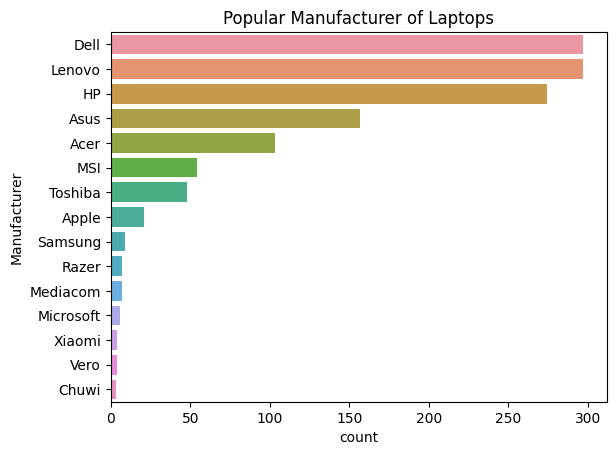

In [15]:
plt.title('Popular Manufacturer of Laptops')
sns.countplot(y=df['Manufacturer'],order=order('Manufacturer',15))

# Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()
df['Manufacturer']=lr.fit_transform(df['Manufacturer'])

In [17]:
print(lr.classes_)

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'LG' 'Lenovo' 'MSI' 'Mediacom' 'Microsoft' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']


In [18]:
df.head()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,1,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,1,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,7,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,1,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,1,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


In [19]:
df['Model_Name'].nunique()

617

In [20]:
df['Model_Name'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [21]:
len(df['Model_Name'].value_counts())

617

In [22]:
df.drop('Model_Name',axis=1,inplace=True)

<Axes: title={'center': 'Laptop Popularity by Category'}, xlabel='count', ylabel='Category'>

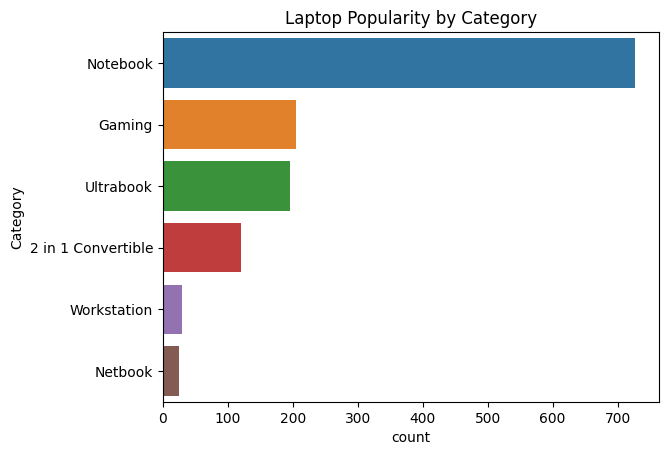

In [23]:
plt.title('Laptop Popularity by Category')
sns.countplot(y=df['Category'],order=order('Category',10))

In [24]:
df['Category'].replace({'Notebook':'Notebook'}, inplace=True)

In [25]:
df['Category'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [26]:
lr= LabelEncoder()
df['Category']=lr.fit_transform(df['Category'])

In [27]:
print(lr.classes_)

['2 in 1 Convertible' 'Gaming' 'Netbook' 'Notebook' 'Ultrabook'
 'Workstation']


In [28]:
df.head()

,Manufacturer,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,1,4,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,1,4,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,7,3,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,1,4,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,1,4,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


# Screen_Size

In [29]:
df['Screen_Size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [30]:
df['Screen_Size']=df['Screen_Size'].str.replace('"', '').astype('float')

In [31]:
df.head()

,Manufacturer,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,1,4,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,7,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,1,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


# Screen

In [32]:
df.Screen.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [33]:
df['Touchscreen']=df['Screen'].str.contains('Touchscreen', case=False).astype('int')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1302 non-null   int64  
 1   Category      1302 non-null   int64  
 2   Screen_Size   1302 non-null   float64
 3   Screen        1302 non-null   object 
 4   CPU           1302 non-null   object 
 5   RAM           1302 non-null   object 
 6    Storage      1302 non-null   object 
 7   GPU           1302 non-null   object 
 8   OS            1302 non-null   object 
 9   OS_Version    1302 non-null   object 
 10  Weight        1302 non-null   object 
 11  Price         1302 non-null   float64
 12  Touchscreen   1302 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 142.4+ KB


In [35]:
#ips
df['IPS_Panel']=df['Screen'].str.contains('IPS',case=False).astype('int')

In [36]:
df['IPS_Panel'].value_counts()

IPS_Panel
0    937
1    365
Name: count, dtype: int64

In [37]:
df['Retina_Display']=df['Screen'].str.contains('Retina',case=False).astype('int')

In [38]:
df['Retina_Display'].value_counts()

Retina_Display
0    1285
1      17
Name: count, dtype: int64

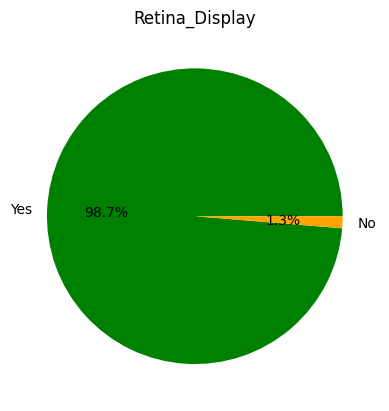

In [39]:
plt.title('Retina_Display')
plt.pie(df['Retina_Display'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['Green','Orange'])
plt.show()

In [40]:
df['Full_HD_Display']=df['Screen'].str.contains('Quad HD+', case=False).astype('int')

In [41]:
df['Full_HD_Display'].value_counts()

Full_HD_Display
0    1272
1      30
Name: count, dtype: int64

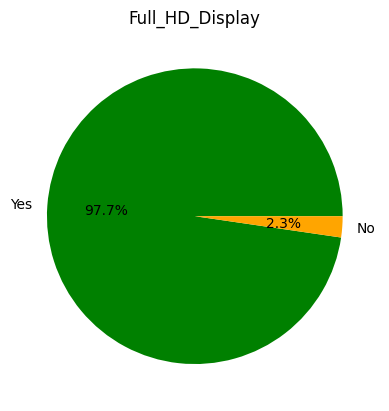

In [42]:
plt.title('Full_HD_Display')
plt.pie(df['Full_HD_Display'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['Green','Orange'])
plt.show()

In [43]:
df['Quad_HD_Display']=df['Screen'].str.contains('Quad HD+', case=False).astype('int')

In [44]:
df['Quad_HD_Display'].value_counts()

Quad_HD_Display
0    1272
1      30
Name: count, dtype: int64

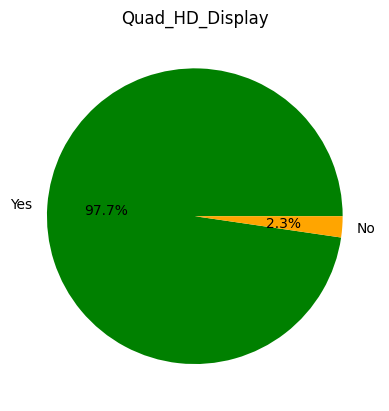

In [45]:
plt.title('Quad_HD_Display')
plt.pie(df['Quad_HD_Display'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['Green','Orange'])
plt.show()

In [46]:
df['xres']=df['Screen'].str.extract(r'(\d+)x\d_').astype('int')
df['yres']=df['Screen'].str.extract(r'\d+x(\d+)').astype('int')
df.drop('Screen',axis=1,inplace=True)

ValueError: cannot convert float NaN to integer

In [ ]:
df['PPI']=(((df['xres']**2+df['yres']**2)**0.5/df['Screen_size']))


In [ ]:
df.drop(['xres','yres'],axis=1 , inplace=True)

In [ ]:
df['Weight'].value_counts().head(10)

In [ ]:
df['Weight']=df['Weight'].str.extract(r'(\d+\.?\d*)').astype('float')

In [ ]:
df.info()

# GPU

In [ ]:
n=df['GPU'].str.split('',n=1, expand=True)
df['GPU']=n[0]
df['GPU'].value_counts()

In [ ]:
lr=LabelEncoder()

In [ ]:
df['GPU']=lr.fit_transform(df['GPU'])

# RAM

In [ ]:
df['RAM']=df['RAM'].str.replace('GB','')
df['RAM']=df['RAM'].astype('int')


In [ ]:
df.info()

# OS VERSION

In [ ]:
df.drop('OS_Version',axis=1,inplace=True)

In [ ]:
lr=LabelEncoder()

In [ ]:
df['OS']=lr.fit_transform(df['OS'])

In [ ]:
df.info()

In [ ]:
df['Pro_Name']=df['CPU'].apply([lambda x:''.join(x.split()[0:3])])
df['Pro_Name'].head(10)

In [ ]:
df['Pro_Name'].value_counts().head(20)

In [ ]:
lr=LabelEncoder()

In [ ]:
df['CPU']=lr.fit_transform(df['Pro_Name'])

In [ ]:
df.columns

In [ ]:
df[' Storage'] = df[' Storage'].str.replace('GB','')
df[' Storage'] = df[' Storage'].str.replace('TB','000') 
first = df[" Storage"].str.split("+", n=1, expand=True)

In [ ]:
df['Part1'] = first[0] 
df['Part2'] = first[1]

In [ ]:
df['Part1'] = df['Part1'].str.strip()
df['Part2'].fillna('0', inplace = True)

In [ ]:
df["Storage1_SSD"] = df["Part1"].apply(lambda x:1 if "SSD" in x else 0)
df["Storage1_HDD"] = df["Part1"].apply(lambda x:1 if "HDD" in x else 0)
df["Storage1_Flash_Storage"] = df["Part1"].apply(lambda x:1 if "Flash_Storage" in x else 0)
df["Storage1_Hybrid_Storage"] = df["Part1"].apply(lambda x:1 if "Hybrid" in x else 0)

In [ ]:
df["Storage2_SSD"] = df["Part2"].apply(lambda x:1 if "SSD" in x else 0)
df["Storage2_HDD"] = df["Part2"].apply(lambda x:1 if "HDD" in x else 0)
df["Storage2_Flash_Storage"] = df["Part1"].apply(lambda x:1 if "Flash_Storage" in x else 0)

In [ ]:
df.info()

In [ ]:
df['Part1']=df['Part1'].str.replace(r'\D+','',regex=True).astype('int')
df['Part2']=df['Part2'].str.replace(r'\D+','',regex=True).astype('int')
df['Part1'].dtype

df["SSD"]=(df["Part1"]*df["Storage1_SSD"]+df["Part2"]*df["Storage2_SSD"])
df["HDD"]=(df["Part1"]*df["Storage1_HDD"]+df["Part2"]*df["Storage2_HDD"])
df["Flash_Storage"]=(df["Part1"]*df["Storage1_Flash_Storage"]+df["Part2"]*df["Storage2_Flash_Storage"])
df["Hybrid_Storage"]=(df["Part1"]*df["Storage1_Hybrid_Storage"]+df["Part2"]*df["Storage1_Hybrid_Storage"])

df.drop(columns=['Part1','Part2','Storage1_SSD','Storage1_HDD','Storage1_Flash_Storage','Storage2_SSD','Storage2_HDD','Storage2_Flash_Storage','Storage1_Hybrid_Storage'], axis =1, inplace = True)
df.head()

In [ ]:
df.columns

In [ ]:
df.drop([' Storage','Pro_Name'],axis=1, inplace=True)

In [ ]:
df.info()

# model building

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Price',axis=1)
y=np.log(df['Price'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
model = {
    "LinearRegression" : LinearRegression(),
    "RandomForest" : RandomForestRegressor(),
    "DecisionTree"  : DecisionTreeRegressor(),
    "xg": XGBRegressor(),
    "Ada" : AdaBoostRegressor(),
    'SVR' : SVR(),
    'KNNR' : KNeighborsRegressor()
}  
for name,model in model.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)
    print("Model:",name)
    print("-----------------------------")
    print("RMSE:", np.sqrt(mean_absolute_error(y_test,p)))
    print("R2 Score:", r2_score(y_test,p))
    print("------------------|\n")

In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
param_grid={
    'max_depth':[80,90,100],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10,12],
    'n_estimators':[30,50,100,200]
}
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
p =grid_search.predict(x_test)
print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
print("R2 Score:",r2_score(y_test,p))

In [ ]:
model=XGBRegressor()
param_grid={
    'learning_rate':[0.1,0.01,0.001],
    'max_depth':[3,5,7],
    'n_estimators':[100,500,1000]
}
grid_search=GridSearchCV(estimator=model,param_grid=param_grid, cv=5)
grid_search.fit(x_train,y_train)
print("Best Hyperparameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)
print("---------------------------------------\n")
p=grid_search.predict(x_test)
print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
print("R2 Score:",r2_score(y_test,p))


In [ ]:
import pickle
file=open('XGBoost.pkl','wb')
pickle.dump(Model,file)
from IPython.display import FileLink
FileLink(r'XGBoost.pkl')